# <center>Metody Numeryczne</center>

# Laboratorium 9: Interpolacja


**Wykonał:** \<Stanisław Nóżka>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem laboratorium jest praktyczne zapoznanie z zagadnieniem interpolacji wielomianowej, ze szczególnym uwzględnieniem jej wariantów numerycznie stabilnych. W ramach zajęć przeanalizowane zostanie działanie interpolacji barycentrycznej opartej na węzłach Czebyszewa.


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [79]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor [węzłów Czebyszewa](https://en.wikipedia.org/wiki/Chebyshev_nodes) drugiego rodzaju (funkcja *`chebyshev_nodes()`*) dany wzorem:
  
$$
x_k = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
$$

oraz wagi barycentryczne dla tego typu wezłów (funkcja *`bar_cheb_weights()`*):

$$
\begin{align*}
    w_j={}&(-1)^j\delta_j\\
    \delta_j={}&
    \begin{cases}
        \frac{1}{2}, \quad j=\{0, n\}\\
        1, \quad j\in(0,n)
    \end{cases}
\end{align*}
$$


---

### **Zadanie 2.**

Zaimplementuj podane funkcje, które będą używane w dalszej części laboratorium:

1. Ciągłą nieróżniczkowalną: $f_1(x) = \mathrm{sgn}(x)x+x^2$.

2. Różniczkowalną jednokrotnie: $f_2(x) = \mathrm{sgn}(x)x^{2}$.

3. Różniczkowalną trzykrotnie: $f_3(x)=|\sin(5 x)|^3$.

4. Trzy analityczne postaci: $f_{4a}(x) = \cfrac{1}{1+ax^2} \ $ dla $a \in \{1,25,100\}$. 

5. Nieciągłą: $f_5(x) = \mathrm{sgn}(x)$.

Funkcje można zaimplementować w notebooku lub w pliku `main.py`. 

>**Wskazówka:** Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).
>
>$\mathrm{sgn}(x)$ to funkcja [signum](https://en.wikipedia.org/wiki/Sign_function).

In [80]:
# ===== Twoja implementacja tutaj =====
f1 = lambda x: np.sign(x)*x +x*x
f2 = lambda x: np.sign(x)*x*x
f3 = lambda x: abs(np.sign(5*x))**3
f4 = {
    1: lambda x: 1/(1+x**2),
    25: lambda x: 1/(1+25*x**2),
    100: lambda x: 1/(1+100*x**2),
}
f5 = lambda x: np.sign(x)

---

### **Zadanie 3.**

Do oceny jakości interpolacji stosuje się normę wektorową $\ell_{\infty}$. Dla różnicy wektorów definiujemy ją jako:  
  
$$
\ell_{\infty} = ||\mathbf{x_1}-\mathbf{x_2}||_\infty = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}
$$  
  
Zaimplementuj funkcję *`L_inf()`* wyznaczającą normę $\ell_{\infty}$. 


---

### **Zadanie 4.**

**Punkt 1.**

Zaimlementuj wzór barycentryczny podany na wykładzie jako funkcję *`barycentric_inte()`*.

<br>

**Punkt 2.**

Dla funkcji ciągłej nieróżniczkowalnej z **Zadania 2.** ($f_1(x)$) przeprowadź interpolację metodą [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji [`sp.interpolate.barycentric_interpolate()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html) jak i korzystając z zaimplementowanego wzoru barycentrycznego. 

W tym celu dla $n \in \{1, 2, 3, 4, 5\}$:

1. W węzłach Czebyszewa wykonaj interpolację rzędu $10^n$.

2. Wykreśl wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w $1000$ punktach).

3. Zbadaj jakość interpolacji za pomocą normy $\ell_{\infty}$.

Opisz jak zmieniały się wartość normy $\ell_{\infty}$ oraz czas obliczeń w zależności od rzędu interpolacji.


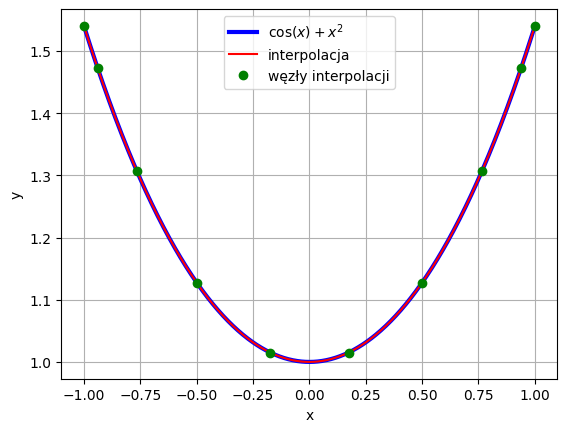

In [81]:
# Przykład użycia interpolacji barycentrycznej z wykorzystaniem węzłów Czebyszewa

# Funkcja do interpolacji
def f(x):
    return np.cos(x) + x**2

# Wektor współrzędnych, dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1, 1, 1000)

# Węzły Czebyszewa
n = int(1e1)  # Liczba węzłów
xch = main.chebyshev_nodes(n)
xch = np.array(xch)
# Interpoalcja
yimp = sp.interpolate.barycentric_interpolate(xch, f(xch), x)

plt.plot(x, f(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.plot(xch, f(xch), 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

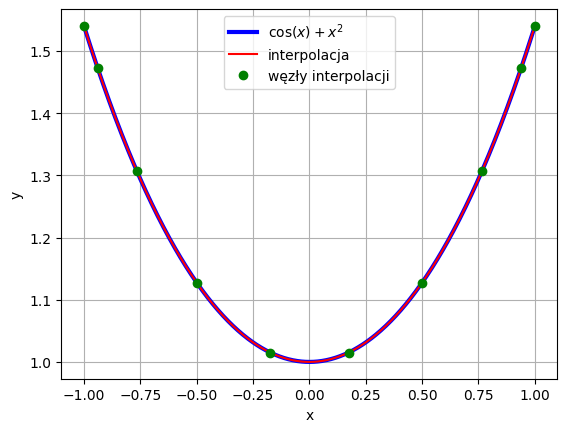

In [82]:
# Przykład użycia interpolacji barycentrycznej z wykorzystaniem węzłów Czebyszewa

# Funkcja do interpolacji
f1

# Wektor współrzędnych, dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1, 1, 1000)

# Węzły Czebyszewa
n = int(1e1)  # Liczba węzłów
xch = main.chebyshev_nodes(n)
xch = np.array(xch)
# Interpoalcja
yimp = sp.interpolate.barycentric_interpolate(xch, f(xch), x)

plt.plot(x, f(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.plot(xch, f(xch), 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

---

### **Zadanie 5.**

Dla funkcji jednokrotnie ($f_2(x)$) i trzykrotnie ($f_3(x)$) różniczkowalnych z **Zadania 2.** należy przeanalizować w pętli jakość interpolacji dla interpolacji rzędu $10^n$, gdzie $n \in \{1, 2, 3, 4, 5\}$. 

W tym celu:

1. Wylicz wartość funkcji i wielomianu interpolacyjnego w $1000$ punktów (nie będącymi węzłami interpolacji np. punkty równoodległe).

2. Wylicz normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.

3. Dla każdej z funkcji sporządź wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.

4. Dla porównania umieść na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

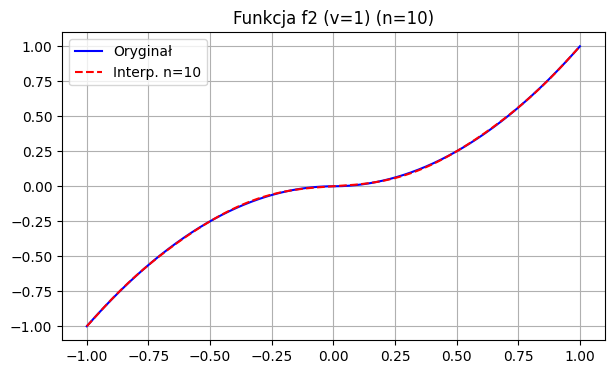

[f2 (v=1)] n=     10 | Błąd: 5.30e-03


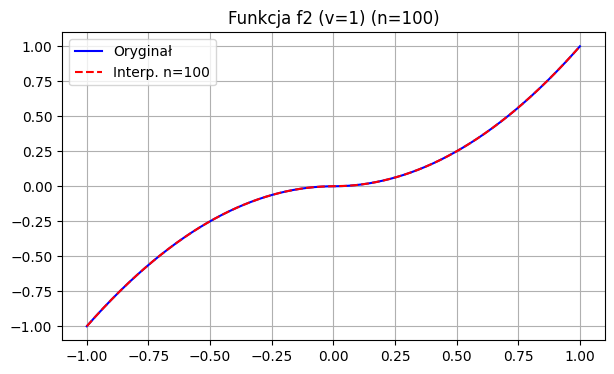

[f2 (v=1)] n=    100 | Błąd: 4.56e-05


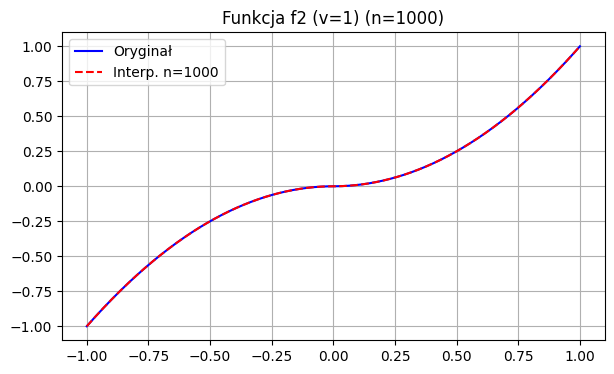

[f2 (v=1)] n=   1000 | Błąd: 4.47e-07


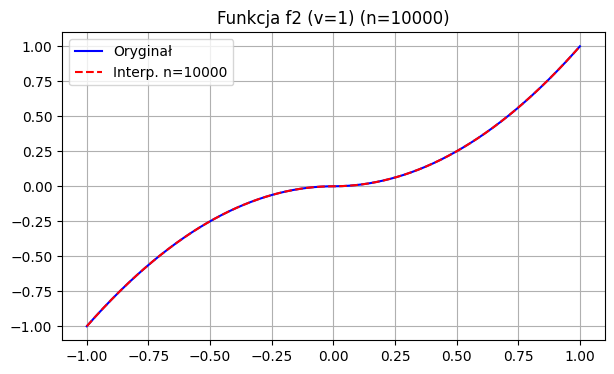

[f2 (v=1)] n=  10000 | Błąd: 1.86e-09


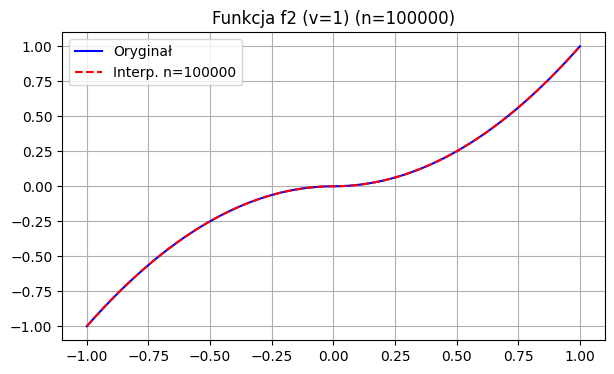

[f2 (v=1)] n= 100000 | Błąd: 2.24e-12


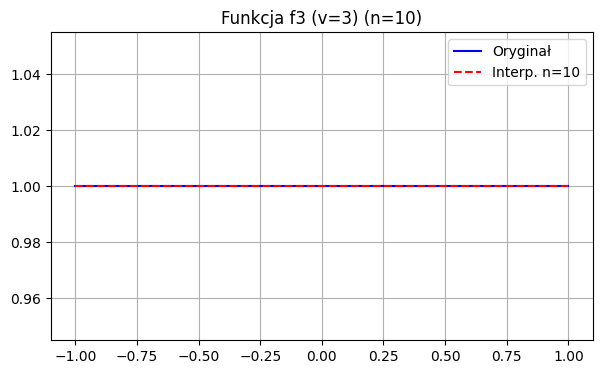

[f3 (v=3)] n=     10 | Błąd: 4.44e-16


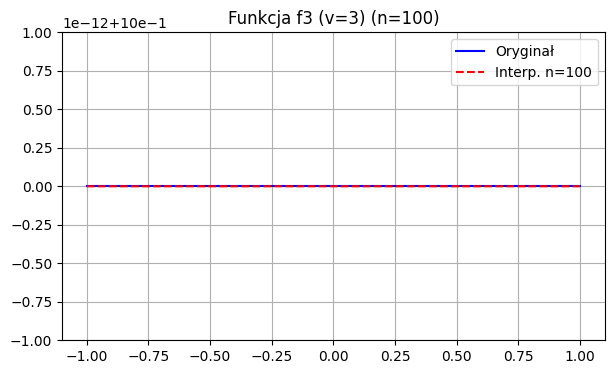

[f3 (v=3)] n=    100 | Błąd: 6.66e-16


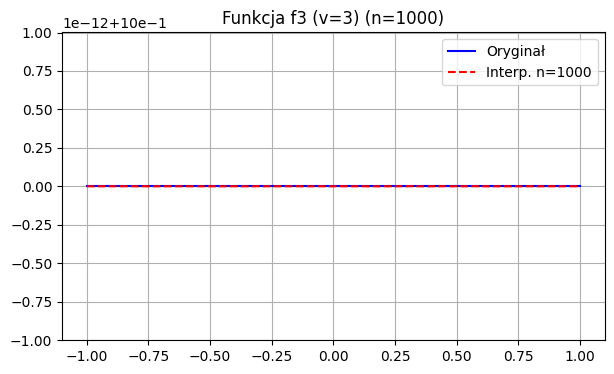

[f3 (v=3)] n=   1000 | Błąd: 1.33e-15


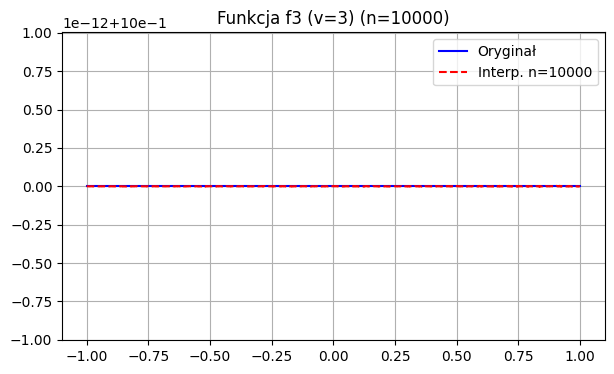

[f3 (v=3)] n=  10000 | Błąd: 3.33e-15


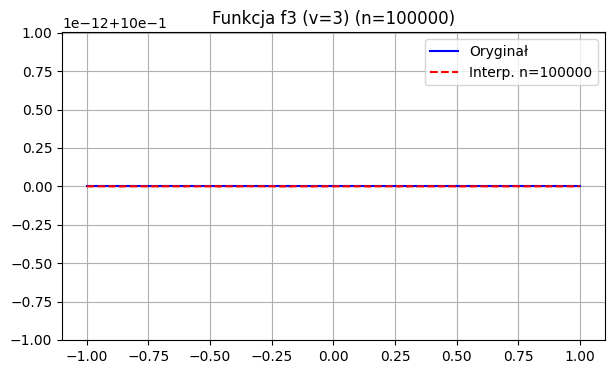

[f3 (v=3)] n= 100000 | Błąd: 2.22e-15


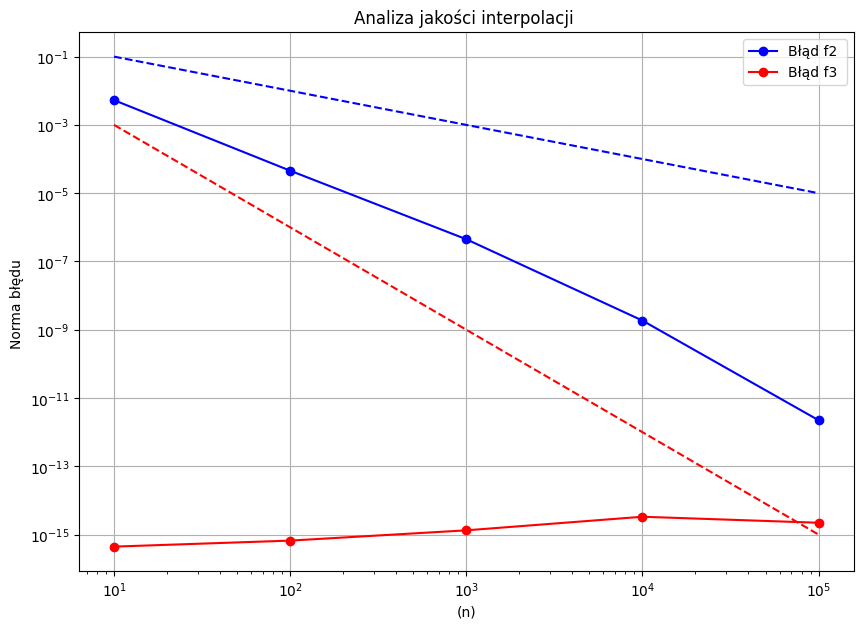

In [83]:

epsilon = np.finfo(np.float64).eps 
max_nodes_limit = 100000 
x_eval = np.linspace(-1, 1, 1000) 

def solve_task(func, func_label):
    nodes_counts = []
    norms = []
    n = 10 # Start od 10^1
    
    while n <= max_nodes_limit:
        cheb_nodes = np.array(main.chebyshev_nodes(n))
        cheb_weights = np.array(main.bar_cheb_weights(n))
        y_interp = main.barycentric_inte(cheb_nodes, func(cheb_nodes), cheb_weights, x_eval)
        
        plt.figure(figsize=(7, 4))
        plt.plot(x_eval, func(x_eval), 'b', label='Oryginał')
        plt.plot(x_eval, y_interp, 'r--', label=f'Interp. n={n}')
        plt.title(f"Funkcja {func_label} (n={n})")
        plt.legend()
        plt.grid(True)
        plt.show()

        norm = main.L_inf(func(x_eval)[1:-2], y_interp[1:-2])
        print(f"[{func_label}] n={n:7} | Błąd: {norm:.2e}")
        
        nodes_counts.append(n)
        norms.append(norm)
        
        if norm < epsilon:
            break
        n *= 10
        
    return nodes_counts, norms

nodes1, norms1 = solve_task(f2, "f2 (v=1)")
nodes2, norms2 = solve_task(f3, "f3 (v=3)")


plt.figure(figsize=(10, 7))

plt.loglog(nodes1, norms1, 'bo-', label='Błąd f2 ')
plt.loglog(nodes1, [n**-1 for n in nodes1], 'b--')

plt.loglog(nodes2, norms2, 'ro-', label='Błąd f3 ')
plt.loglog(nodes2, [n**-3 for n in nodes2], 'r--')

plt.title('Analiza jakości interpolacji ',)
plt.xlabel('(n)')
plt.ylabel('Norma błędu ')
plt.grid(True)
plt.legend()
plt.show()

---

### **Zadanie 6.**

Dla funkcji nieciągłej z **Zadania 2.** ($f_5(x)$) przeanalizować należy [efekt Gibbsa](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

1. Oddzielnie dla parzystych i nieparzystych $n$ wylicz jaki jest minimalny błąd niezależny od rzędu. 

2. Odpowiedz dlaczego wartości dla parzystych i nieparzystych $n$ się różnią.

> **Wskazówka:** Wykonaj wykres funkcji i jej funkcji interpolującej.

Typ n           | Minimalny błąd L_inf
Parzyste        | 0.9265
Nieparzyste     | 1.9551


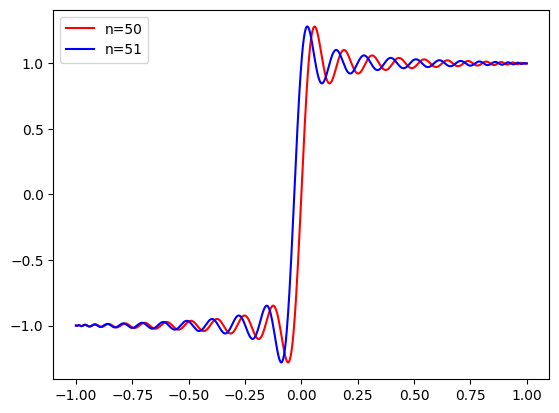

In [ ]:
# ===== Twoja implementacja tutaj =====
n_val = np.arange(10, 101)
x_f = np.linspace(-1, 1, 1000)
err_p, err_np = [], []

results = {'parzyste': [], 'nieparzyste': []}
for n in n_val:
    xi = np.array(main.chebyshev_nodes(n))
    wi = main.bar_cheb_weights(n)
    yi = np.sign(xi)
    
    p = main.barycentric_inte(xi, yi, wi, x_f)
    err = main.L_inf(f5(x_f), p)
    
    key = 'parzyste' if n % 2 == 0 else 'nieparzyste'
    results[key].append(err)

print(f"{'Typ n':<15} | {'Minimalny błąd L_inf':<20}")
for key, values in results.items():
    print(f"{key.capitalize():<15} | {min(values):.4f}")

for n, c in zip([50, 51], ['r', 'b']):
    xi = np.array(main.chebyshev_nodes(n))
    y_f =main.barycentric_inte(xi, f5(xi), main.bar_cheb_weights(n), x_f)
    plt.plot(x_f, y_f, label=f'n={n}', color=c)
plt.legend(); plt.show()

#Liczby nieparzyste mają węzeł w miejscu "skoku"
# funkcji, co stabilizuje wykres. 
# Liczby parzyste go nie mają, co powoduje ogromny
# błąd w punkcie x=0

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)